## Final Project Submission

Please fill out:
* **Student name**: David Boyd
* **Student pace**: self paced 
* **Scheduled project review date/time**: N/A
* **Instructor name**: Abhineet Kulkarni


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

## EDA Phase

In [64]:
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [65]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [66]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [67]:
"""Looking at the above, we can see there are null values in yr_renovated, view, waterfront which need to be 
handled before potentially using them in a model. It is also clear that certain fields won't be useful to the model,
these are lat, long, date and id"""

"Looking at the above, we can see there are null values in yr_renovated, view, waterfront which need to be \nhandled before potentially using them in a model. It is also clear that certain fields won't be useful to the model,\nthese are lat, long, date and id"

In [68]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [74]:
df_cat = df[['waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'sqft_basement']]
df_cat.head()

,waterfront,view,condition,grade,yr_renovated,sqft_basement
0,NaN,NONE,Average,7 Average,0.0,0
1,NO,NONE,Average,7 Average,1991.0,400
2,NO,NONE,Average,6 Low Average,0.0,0
3,NO,NONE,Very Good,7 Average,0.0,910
4,NO,NONE,Average,8 Good,0.0,0


In [75]:
for col in df_cat.columns:
    print(df_cat[col].unique()) # to print categories name only
    print(df_cat[col].value_counts()) # to print count of every category

[nan 'NO' 'YES']
NO     19075
YES      146
Name: waterfront, dtype: int64
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006

## Preprocessing Stage

Looking at the above tables there are several steps to complete in this section, which have been listed below:
- Clean up the missing values on the yr_renovated column, assume is NAN then it hasn't been renovated, so 0 will be inputted.
- Using the date, pull out the yr_sold to help calculate the age of the property at sale, years since renovation
- Calculate sqft_outdoors from sqft_lot - sqft_living to see if an increase in outdoor space influences price
- Create booleans to identify if it has had a renovation, or if the property has a basement, to show roughly what extra value they add to a property (considered with the age/size of each feature later on)

Once the steps above have been completed we are able to look at the correlation between different features with the price. This will help us determine which features we are able to drop, then can begin on encoding any categorical columns left.

In [71]:
df['date'] = pd.to_datetime(df['date'])
df['yr_sold'] = df['date'].dt.year
df['prop_age'] = df['yr_sold'] - df['yr_built']

df['yr_renovated'].fillna(0, inplace=True)

In [78]:
df['yrs_since_upgrade'] = np.where(df['yr_renovated'] == 0, df['prop_age'],
                          np.where(df['yr_renovated'] != 0, df['yr_sold'] - df['yr_renovated'], 0))

df['had_upgrade'] = np.where(df['yr_renovated'] == 0, "No",
                          np.where(df['yr_renovated'] != 0, "Yes", "No"))

df['has_basement'] = np.where(df['sqft_basement'].isin([0,'?']) , "No",
                          np.where(df['sqft_basement'] != 0, "Yes", "No"))


In [79]:
df['sqft_outdoors'] = df['sqft_lot'] - df['sqft_living']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   price              21597 non-null  int64         
 3   bedrooms           21597 non-null  int64         
 4   bathrooms          21597 non-null  float64       
 5   sqft_living        21597 non-null  int64         
 6   sqft_lot           21597 non-null  int64         
 7   floors             21597 non-null  float64       
 8   waterfront         19221 non-null  object        
 9   view               21534 non-null  object        
 10  condition          21597 non-null  object        
 11  grade              21597 non-null  object        
 12  sqft_above         21597 non-null  int64         
 13  sqft_basement      21597 non-null  object        
 14  yr_bui

In [80]:
# Dropping all unneccesary columns
df = df.drop(['id','date', 'waterfront', 'view', 'zipcode', 'lat', 'long', 'yr_renovated', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_basement'], axis=1)

Time to visualise each of the numeric columns left to understand whether they are normally distributed or not.

<AxesSubplot:>

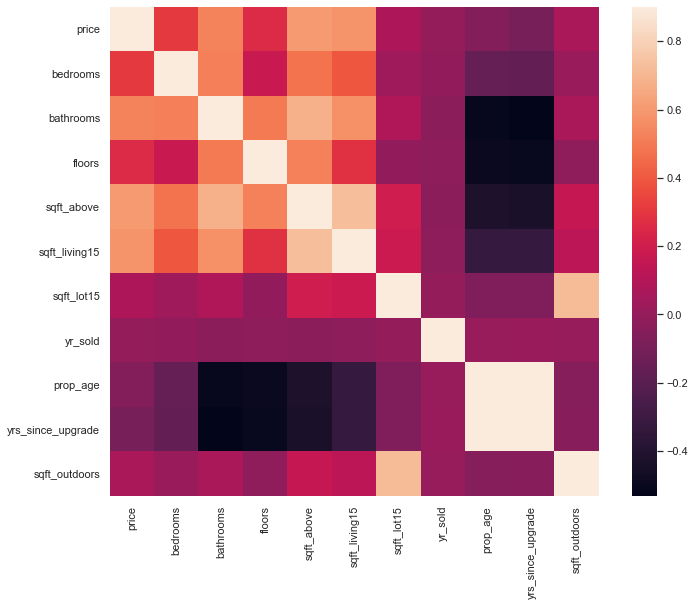

In [81]:
# Plot the Correlation map to see how features are correlated with target: Price
corr_matrix = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

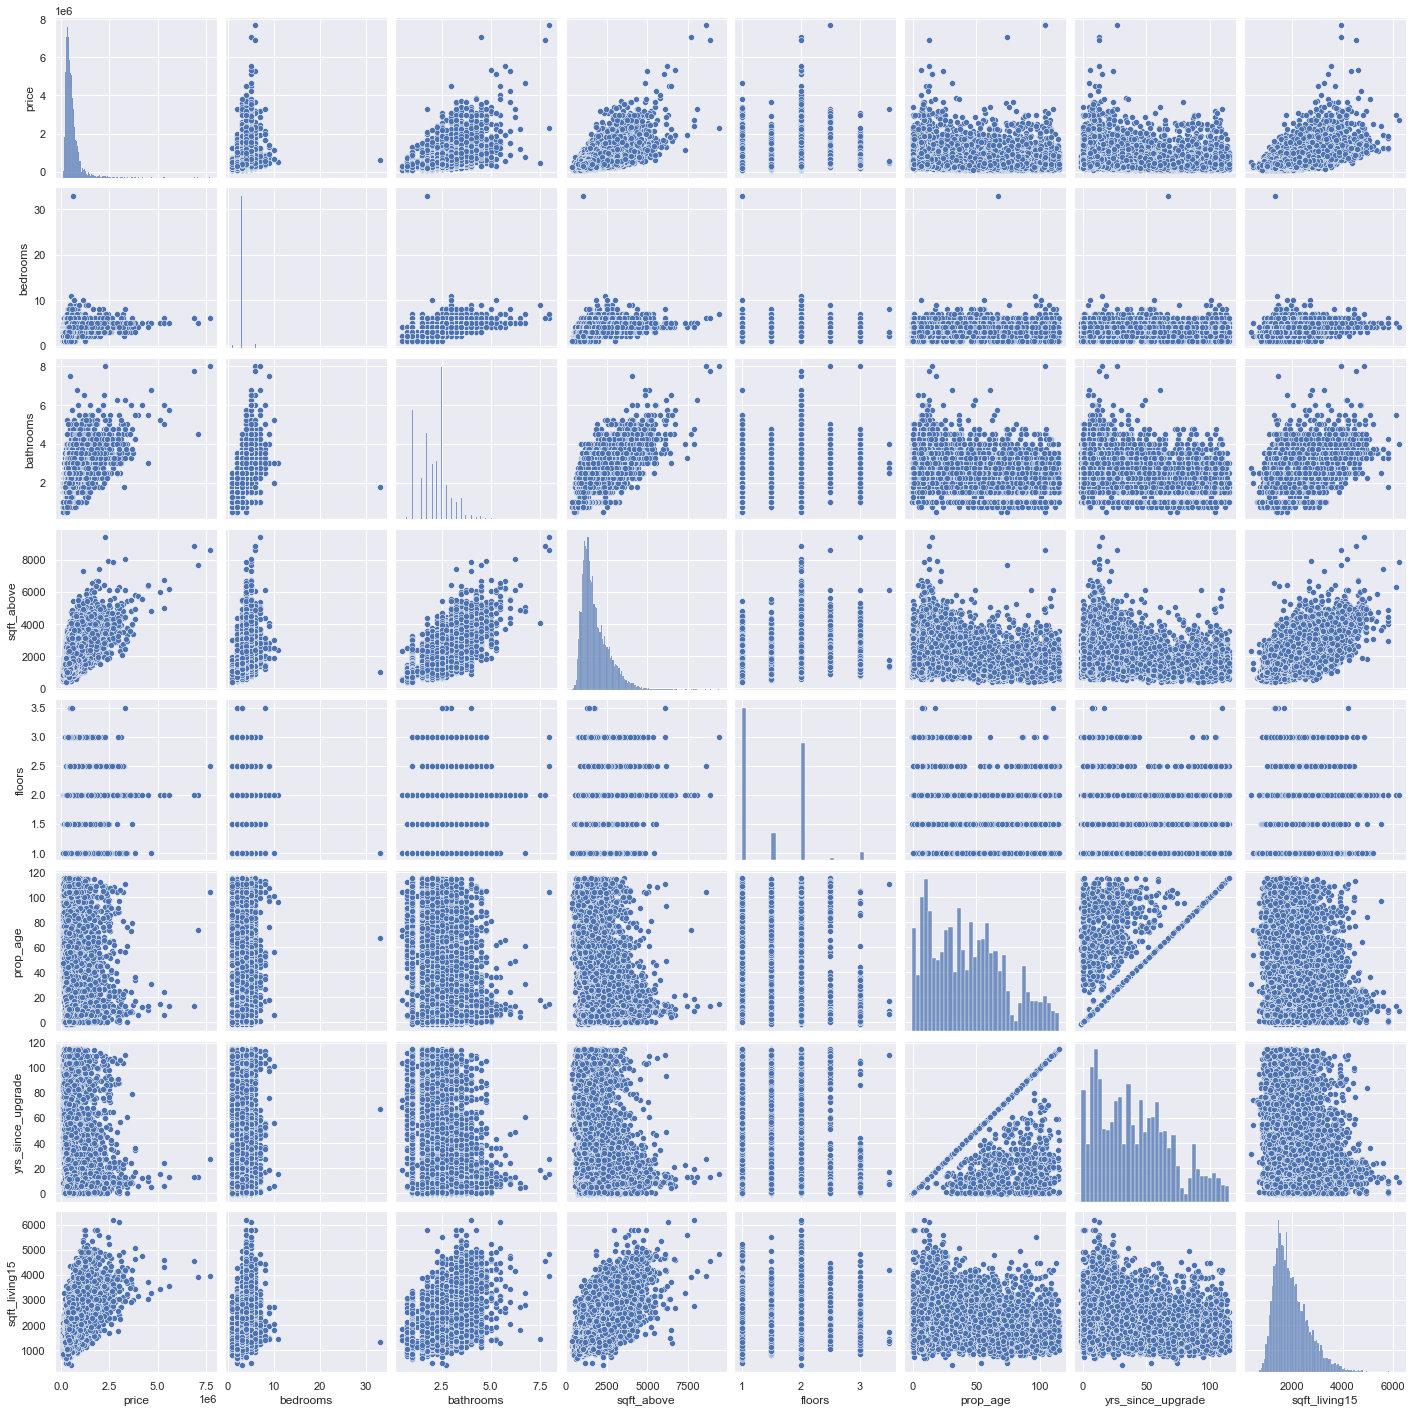

In [83]:
sns.set()
cols = ['price', 'bedrooms', 'bathrooms','sqft_above' ,'floors', 'prop_age', 'yrs_since_upgrade', 'sqft_living15']
sns.pairplot(df[cols], height = 2.5)
plt.show();

## Handling Outliers

After handling the outliers, we need to handle the following aspects:
- Numeric data needs to be standardised
- Categorical data needs to be one hot encoded/binary encoded
- Transform the price to remove skewness

In [18]:
y = df['price']
X = df.drop('price', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)